**Aikins Acheampong**

Fall 2024

CS 251 / 252: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 3: Analyzing the results of PCA

In this task, you will apply PCA to the Iris dataset and analyze properties of the PCA representation.

### 3a. Import Iris data

In the cell below:
- load in the Iris dataset into a pandas DataFrame.
- select all numeric headers (i.e. drop `species`).
- Print out the head (only showing the first 5 data samples).

You should see (with better formatting):

```
	sepal_length	sepal_width	petal_length	petal_width
0	5.1	3.5	1.4	0.2
1	4.9	3.0	1.4	0.2
2	4.7	3.2	1.3	0.2
3	4.6	3.1	1.5	0.2
4	5.0	3.6	1.4	0.2
```

In [2]:
iris_df = pd.read_csv('data/iris.csv')
iris_df = iris_df[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']]
iris_df.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 3b. Apply PCA to Iris

You should make the following plots:
1. Elbow plot of cumulative variance accounted for by first $k$ principal components.
2. Written description of your choice of number of PCs preserved and why.
3. Visualization (plot) of PCA projected data on 1st two PCs.

You should normalize the dataset when performing your PCA projection.

<Figure size 1000x600 with 0 Axes>

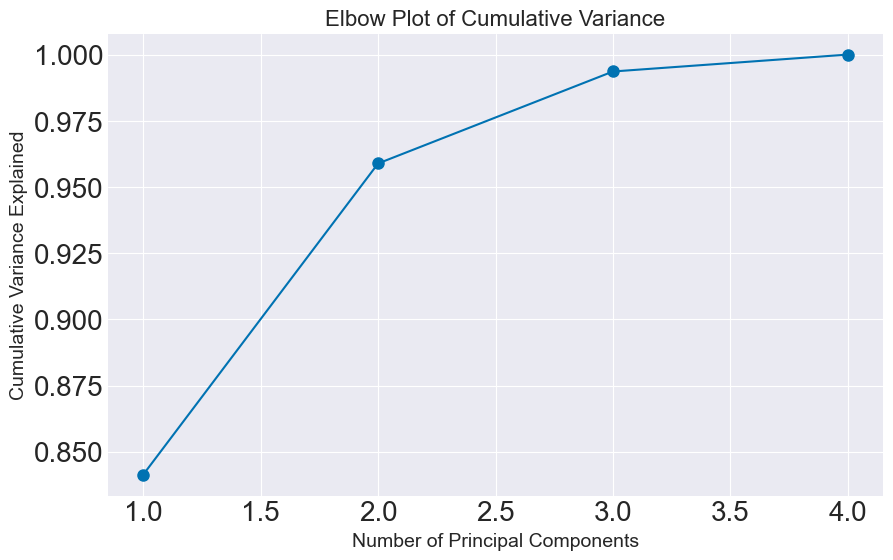

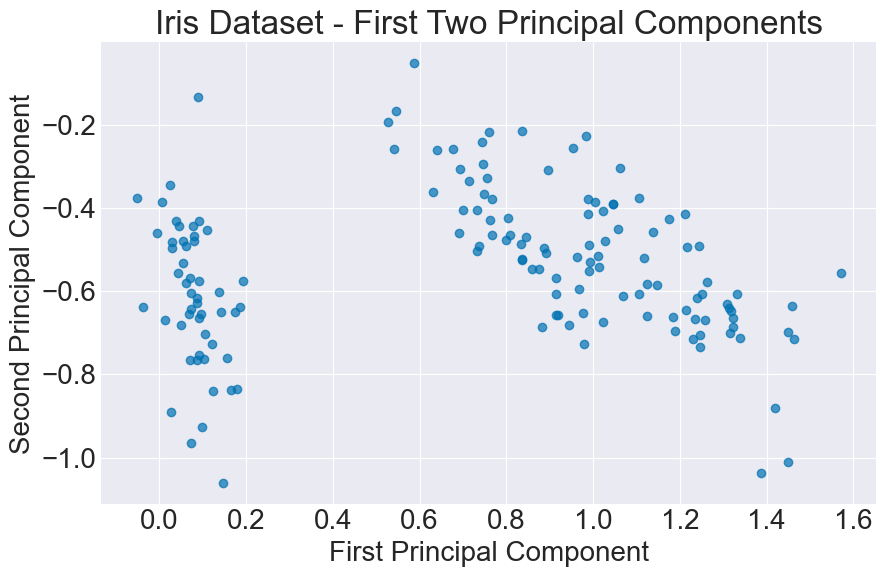


Variance explained by each PC:
PC1: 84.136%
PC2: 11.752%
PC3: 3.474%
PC4: 0.639%

Cumulative variance explained:
First 1 PCs: 84.136%
First 2 PCs: 95.888%
First 3 PCs: 99.361%
First 4 PCs: 100.000%


In [3]:
pca_iris = pca.PCA(iris_df)
pca_iris.fit(iris_df.columns, normalize_dataset=True)

plt.figure(figsize=(10, 6))
pca_iris.elbow_plot()
plt.show()

proj_data = pca_iris.pca_project([0, 1])

plt.figure(figsize=(10, 6))
plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Iris Dataset - First Two Principal Components')

plt.show()

print("\nVariance explained by each PC:")
for i, var in enumerate(pca_iris.prop_var):
    print(f"PC{i+1}: {var:.3%}")

print("\nCumulative variance explained:")
for i, var in enumerate(pca_iris.cum_var):
    print(f"First {i+1} PCs: {var:.3%}")



### 3c. Dropping different pairs of principal components

In the cell below, create a "high quality" 2x2 subplots grid of scatter plots that drops different consecutive PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [3, 4]
- (top-right) PCs [2, 3]
- (bottom-left) PCs [4, 1]
- (bottom-right) PCs [1, 2]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legible.

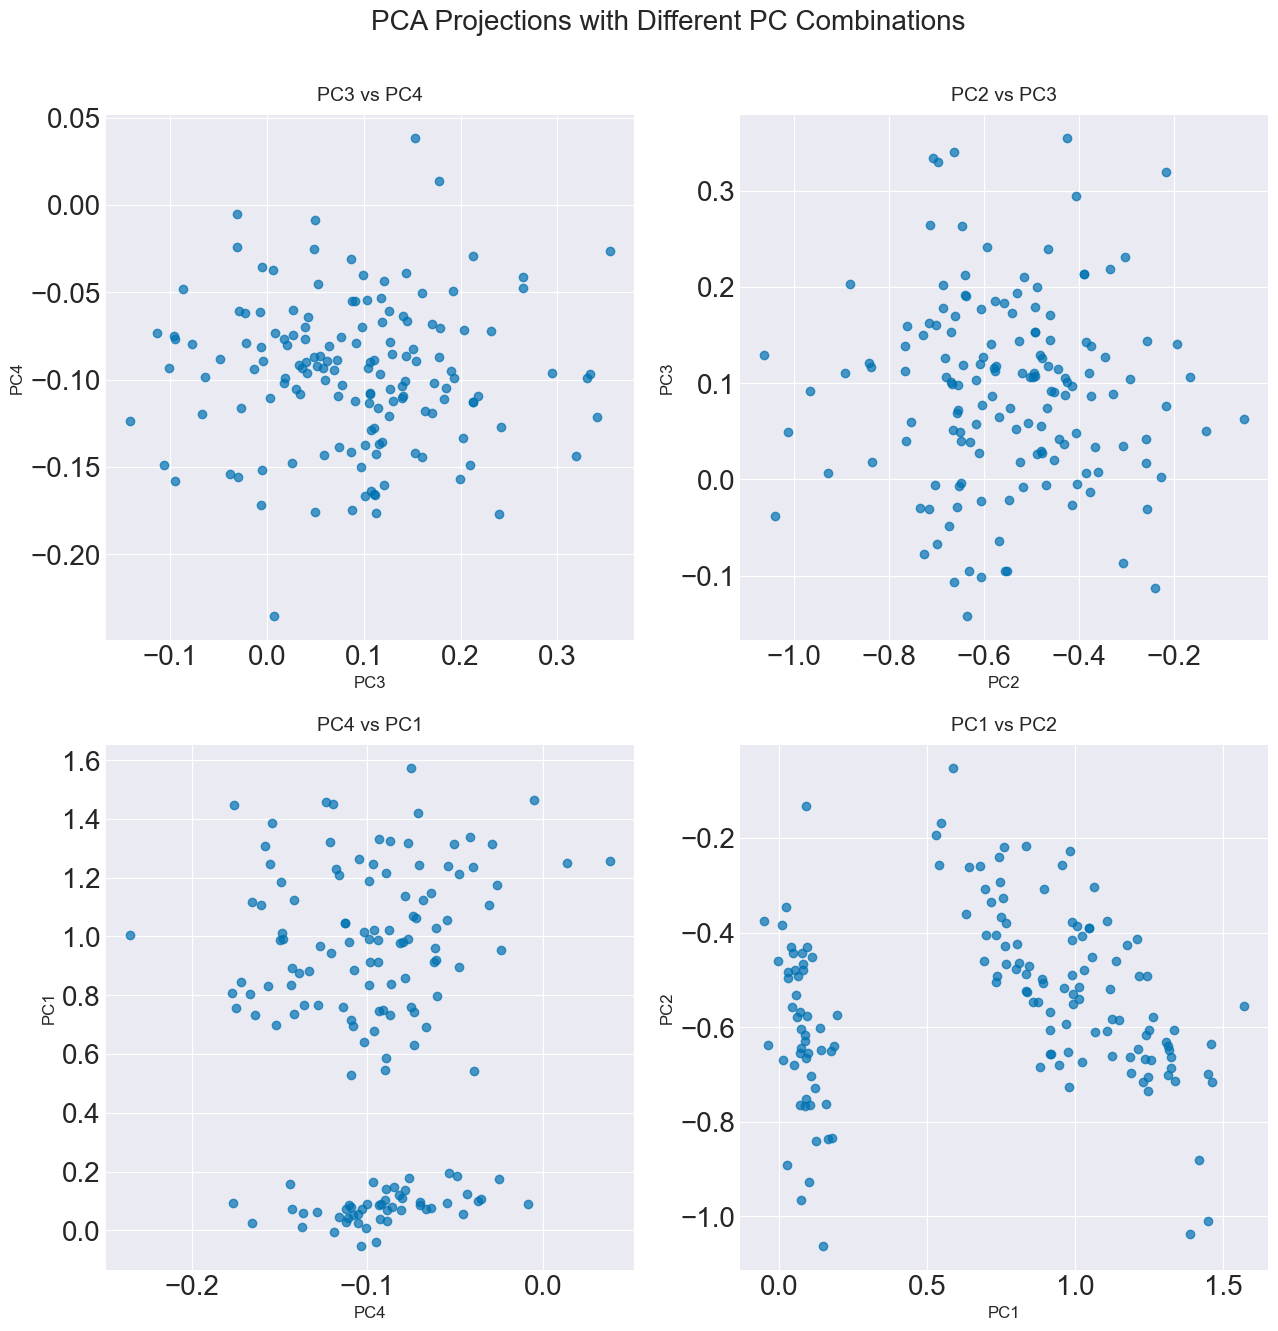

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('PCA Projections with Different PC Combinations', fontsize=20, y=0.95)

pc_combinations = [
    ([2, 3], (0, 0), 'PC3 vs PC4'),
    ([1, 2], (0, 1), 'PC2 vs PC3'),
    ([3, 0], (1, 0), 'PC4 vs PC1'),
    ([0, 1], (1, 1), 'PC1 vs PC2')
]

for pcs, (row, col), title in pc_combinations:
    proj_data = pca_iris.pca_project(pcs)
    
    ax = axes[row, col]
    ax.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7)
    
    ax.set_xlabel(f'PC{pcs[0]+1}', fontsize=12)
    ax.set_ylabel(f'PC{pcs[1]+1}', fontsize=12)
    ax.set_title(title, fontsize=14, pad=10)

plt.show()

### 3d. Questions

**Question 8:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Answer 8:** 
The plots show the data projected onto different PC pairs. PC1 vs PC2 shows the clearest separation of data points, indicating they capture the most meaningful structure. Higher-numbered PCs (3,4) show less distinct patterns, suggesting they capture less important variations or noise.

### 3e. Reconstruct data based on PCs

In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space. Then in the cell below, create a scatter plot of the two data variables `sepal_length` (x), `sepal_width` (y) of the Iris data **without any normalization**.


Cumulative variance explained:
First 1 PC(s): 84.136%
First 2 PC(s): 95.888%
First 3 PC(s): 99.361%
First 4 PC(s): 100.000%


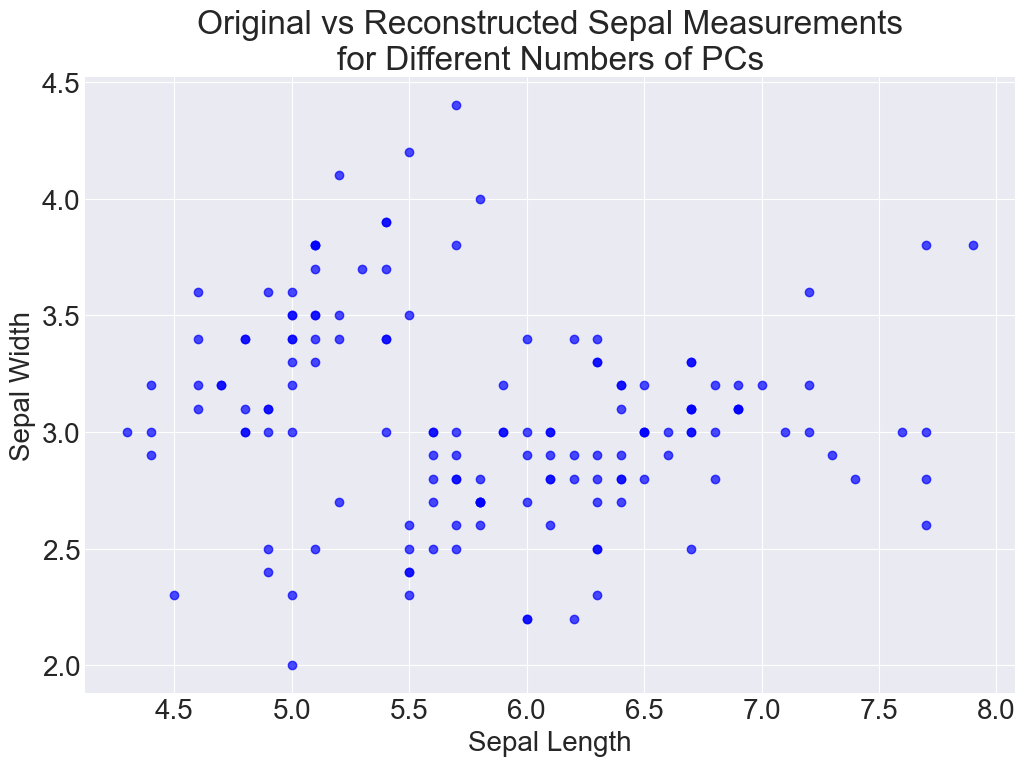

In [5]:

plt.figure(figsize=(12, 8))


plt.scatter(iris_df['sepalLength'], iris_df['sepalWidth'], 
           alpha=0.7, label='Original', color='blue')


k_values = [1, 2, 3, 4]
colors = ['red', 'green', 'purple', 'orange']

for k, color in zip(k_values, colors):
    reconstructed_data = pca_iris.pca_then_project_back(k)
    if isinstance(reconstructed_data, pd.DataFrame):
        reconstructed_data = reconstructed_data.to_numpy()
    
    plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], 
               alpha=0.3, label=f'k={k}', color=color)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Original vs Reconstructed Sepal Measurements\nfor Different Numbers of PCs')


print("\nCumulative variance explained:")
for i, var in enumerate(pca_iris.cum_var):
    print(f"First {i+1} PC(s): {var:.3%}")

plt.show()

In the cell below, apply PCA on the Iris dataset **without any normalization** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepal_length`, `sepal_width` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.

If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your `sepal_length`, `sepal_width` plot created one cell above — including the data range and center).

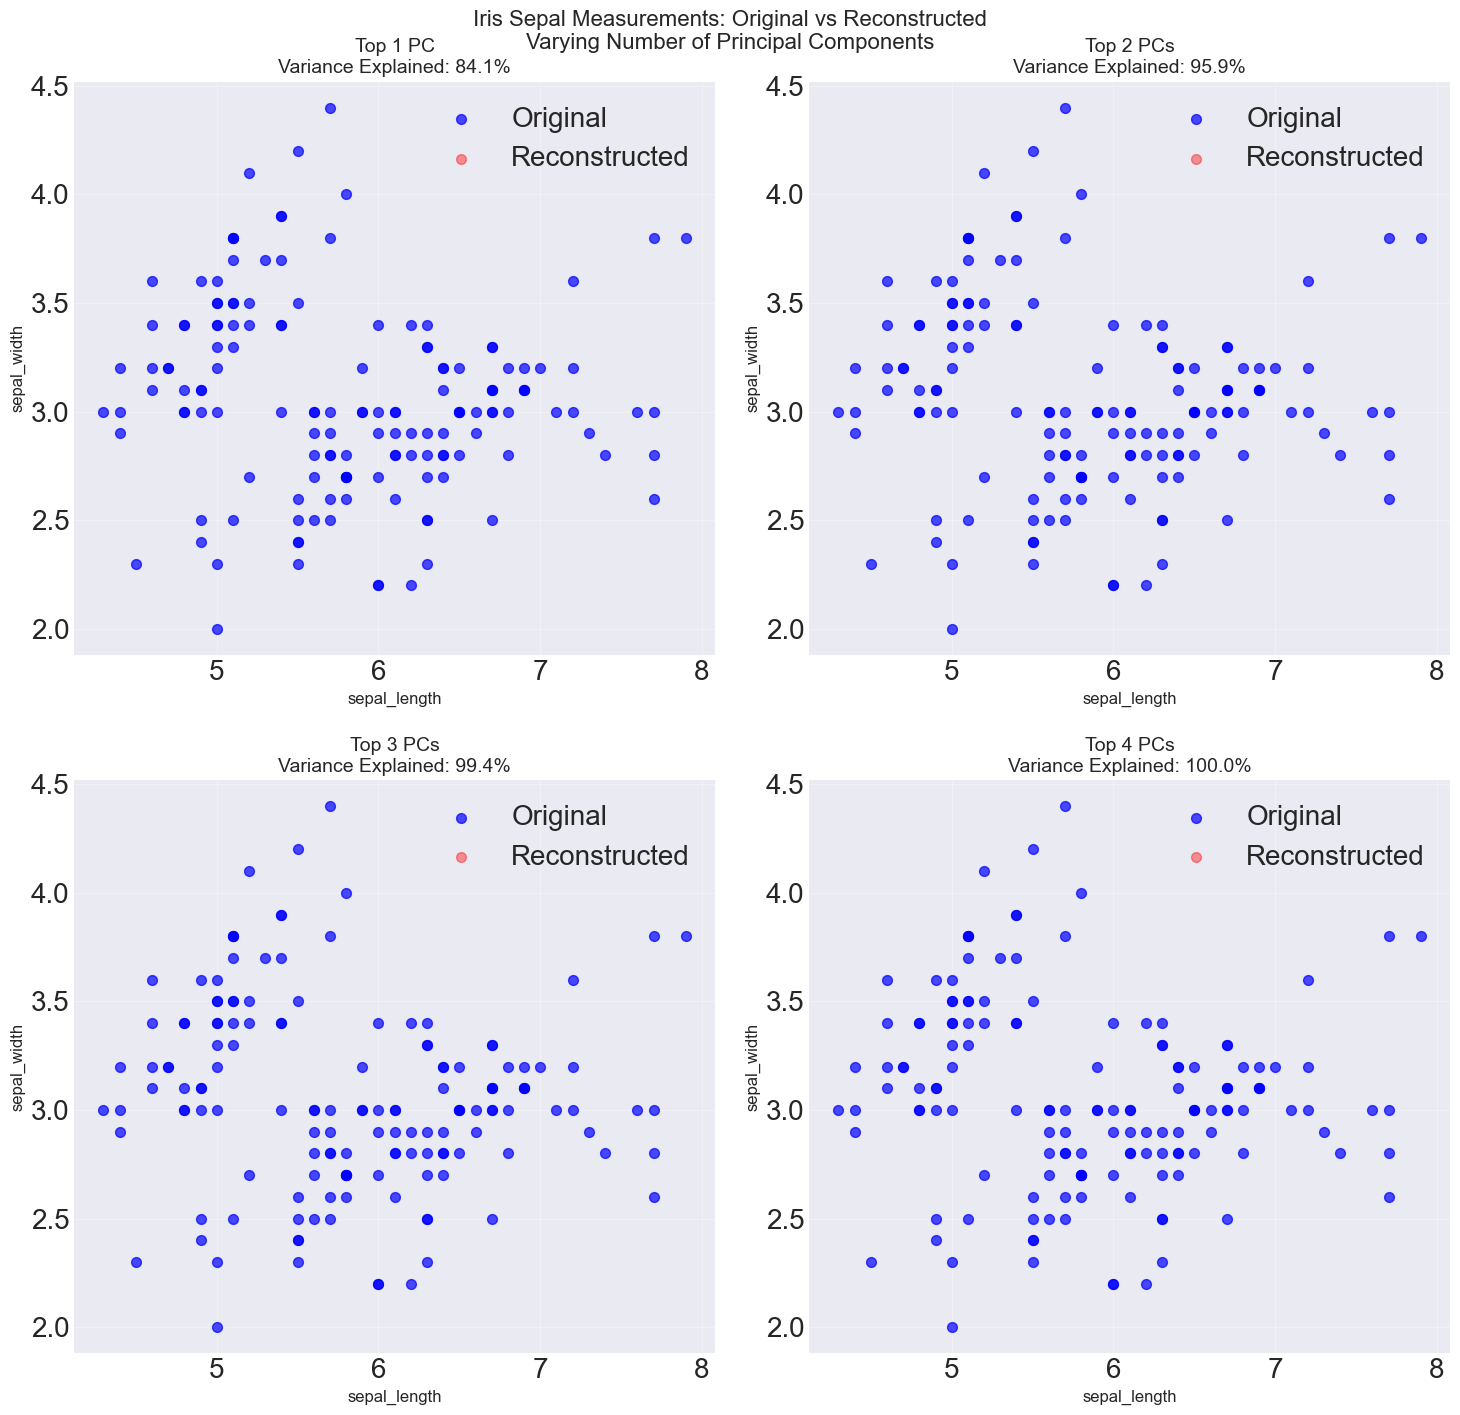


Cumulative variance explained:
First 1 PC(s): 84.136%
First 2 PC(s): 95.888%
First 3 PC(s): 99.361%
First 4 PC(s): 100.000%


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Iris Sepal Measurements: Original vs Reconstructed\nVarying Number of Principal Components', 
             fontsize=16, y=0.95)

axes_flat = axes.flatten()

x_min, x_max = iris_df['sepalLength'].min(), iris_df['sepalLength'].max()
y_min, y_max = iris_df['sepalWidth'].min(), iris_df['sepalWidth'].max()

x_padding = (x_max - x_min) * 0.05
y_padding = (y_max - y_min) * 0.05
x_range = [x_min - x_padding, x_max + x_padding]
y_range = [y_min - y_padding, y_max + y_padding]

for k, ax in enumerate(axes_flat, 1):
    reconstructed_data = pca_iris.pca_then_project_back(k)
    if isinstance(reconstructed_data, pd.DataFrame):
        reconstructed_data = reconstructed_data.to_numpy()

    ax.scatter(iris_df['sepalLength'], iris_df['sepalWidth'], 
              alpha=0.7, label='Original', color='blue', s=50)

    ax.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], 
              alpha=0.4, label='Reconstructed', color='red', s=50)

    ax.set_xlabel('sepal_length', fontsize=12)
    ax.set_ylabel('sepal_width', fontsize=12)
    ax.set_title(f'Top {k} PC{"s" if k > 1 else ""}\n'
                 f'Variance Explained: {pca_iris.cum_var[k-1]:.1%}',
                 fontsize=14)

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

print("\nCumulative variance explained:")
for i, var in enumerate(pca_iris.cum_var):
    print(f"First {i+1} PC(s): {var:.3%}")

### 3f. Questions

**Question 9:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Answer 9:** 
As more PCs are included, the reconstructions better match the original data. With just 1 PC, the data maintains basic structure but loses detail (84.1% variance). Using 2 PCs captures most patterns (95.9%), while 3 PCs (99.4%) is nearly identical to the original. 4 PCs gives perfect reconstruction (100%).

### 3g. Implement loading plot

To visualize how the top two principal components relate to original data variables, implement `loading_plot` in `pca.py`.

### 3h. Questions

**Question 10:** Call your `loading_plot` method to generate a loading plot of the Iris dataset. What do the loadings tell us what the first two PCs measure specifically, with respect to the original data variables?

**Question 11:** What specific correlations among original data variables do the loadings help us identity?

**Answer 10:** 
PC1 primarily measures overall flower size, with strong positive loadings for petal measurements (length/width) and moderate loading for sepal length. PC2 contrasts sepal width against other measurements, distinguishing flowers with wide sepals from those with narrow sepals.

**Answer 11:** 
The loadings reveal:

- Strong positive correlation between petal length and petal width (vectors point in similar directions)
- Sepal width is negatively correlated with other variables (vector points opposite)
- Sepal length is moderately correlated with petal measurements
- Sepal width is most distinct/independent feature

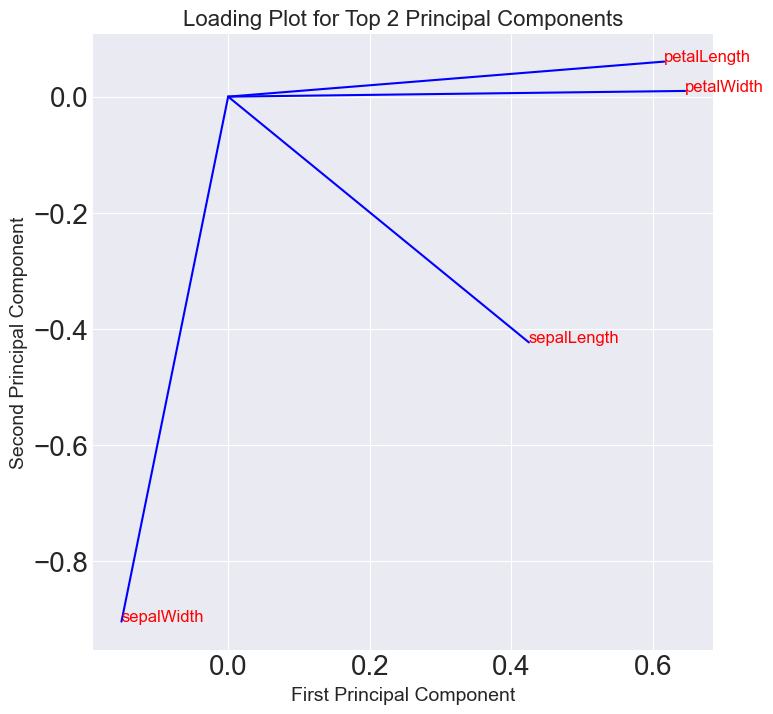


PC1 loadings:
sepalLength: 0.425
sepalWidth: -0.151
petalLength: 0.616
petalWidth: 0.646

PC2 loadings:
sepalLength: -0.423
sepalWidth: -0.904
petalLength: 0.060
petalWidth: 0.010


In [7]:

pca_iris.loading_plot()
plt.show()

print("\nPC1 loadings:")
for var, loading in zip(iris_df.columns, pca_iris.e_vecs[:, 0]):
    print(f"{var}: {loading:.3f}")

print("\nPC2 loadings:")
for var, loading in zip(iris_df.columns, pca_iris.e_vecs[:, 1]):
    print(f"{var}: {loading:.3f}")